# Trapping Rain Water
$\quad$ Given $n$ non-negative integers representing an elevation map where the width of each bar is $1$, compute how much water it can trap after raining.

# Examples
**Example 1:**<br>
Input: $height = [0,1,0,2,1,0,1,3,2,1,2,1]$<br>
Output: $6$<br>
Explanation: The above elevation map (black section) is represented by array $[0,1,0,2,1,0,1,3,2,1,2,1]$. In this case, $6$ units of rain water (blue section) are being trapped.

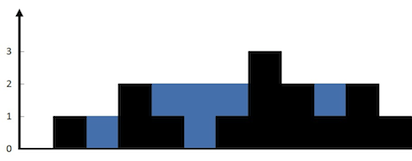

# Analysis
$\quad$ Assume that $height=[h_0,h_1,\cdots,h_{n-1}]$. If $h_i\le h_j$ with $i<j$, then for any $k\in [i+1,j-1]$ such that $h_k\le h_i$, the amount of rain water that can be trapped at coordinate $k$ is exactly $h_i-h_k$ units. Conversely, if $h_i\le h_j$ with $i<j$, then for any $k\in [i+1,j-1]$ such that $h_k\le h_j$, the amount of rain water that can be trapped at coordinate $k$ is exactly $h_j-h_k$ units.

$\quad$ Let there be two walls: $leftmost$ and $rightmost$. Initially, left $leftmost=0$ and $rightmost=n-1$. We may assume that $h_0\le h_{n-1}$. Let $i_1$ be the smallest integer in $[1,n-1]$ (if it exists) such that $h_{i_1}>h_0$. According the above observation, for any $i\in [1,i_1-1]$, the amount of rain water that can be trapped at coordinate $i$ is exactly $h_0-h_i$ units. Add them to $total$ one by one. Since the rainwater trapped at the previous coordinates has already been accounted for, we can update $leftmost$ to $i_1$ and repeat the above process. Since $i_1\ge 1$, the process is indeed progressing.

In [ ]:
class Solution:
    def trap(self, height: list[int]) -> int:
        n = len(height)
        leftmost = 0
        rightmost = n - 1
        total = 0
        while leftmost < rightmost:
            if height[leftmost] <= height[rightmost]:
                i = leftmost + 1
                while i < rightmost and height[i] <= height[leftmost]:
                    total += height[leftmost] - height[i]
                    i += 1
                leftmost = i
            else:
                j = rightmost - 1
                while j > leftmost and height[j] <= height[rightmost]:
                    total += height[rightmost] - height[j]
                    j -= 1
                rightmost = j
        return total

In [ ]:
# This is someone else's code from LeetCode.
class Solution:
    def trap(self, height: list[int]) -> int:
        i = 0
        left_max = height[0]
        sum = 0
        j = len(height) - 1
        right_max = height[j]
        while i < j:
            if left_max <= right_max:
                sum += left_max - height[i]
                i += 1
                left_max = max(left_max, height[i])
            else:
                sum += right_max - height[j]
                j -= 1
                right_max = max(right_max, height[j])
        return sum